In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn import preprocessing


In [2]:
# get absolute path
abs_path = Path.cwd()
print(abs_path)
data_address = abs_path.parent.parent / 'data/' / 'US.csv/'

/mnt/c/Users/user/desktop/Project/code/Transportaion-Pipline


In [3]:
# Load dataset
df = pd.read_csv(data_address)

In [6]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-950001,2,2021-07-03 13:40:55.000000,2021-07-03 15:10:00.000000,39.105609,-94.486080,39.127009,-94.497600,1.602,Incident on I-435 NB near FRONT ST Left lane b...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-950002,2,2021-09-29 09:28:00.000000,2021-09-29 11:40:04.000000,37.973774,-122.525960,37.972938,-122.526058,0.058,Accident from 5th Ave to 4th St.,...,False,False,True,False,False,False,Day,Day,Day,Day
2,A-950003,2,2021-12-07 08:45:00.000000,2021-12-07 10:49:58.000000,32.802966,-96.791708,32.803720,-96.793456,0.114,Slow traffic from N Haskell Ave (Lemmon Ave) t...,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-950004,2,2021-10-23 13:57:28.000000,2021-10-23 15:57:53.000000,30.048197,-89.957760,30.057067,-89.943700,1.040,Incident on BLK S I-10 SERVICE RD near HOUSE 1...,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-950005,2,2021-12-13 06:35:00.000000,2021-12-13 08:41:09.000000,37.832719,-122.216752,37.833979,-122.217682,0.101,Accident on Park Blvd (CA-13) from Moraga Ave/...,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A-999996,2,2021-04-07 08:45:59,2021-04-07 10:27:35,40.424784,-74.219459,40.435444,-74.251519,1.840,Crash on Garden State Parkway Local Lanes nort...,...,False,False,False,False,False,False,Day,Day,Day,Day
49996,A-999997,2,2021-12-10 22:30:32,2021-12-11 01:59:04,44.951654,-93.141838,44.951643,-93.121582,0.990,Construction on I-94 near HURON BLVD Drive wit...,...,False,False,False,False,False,False,Night,Night,Night,Night
49997,A-999998,2,2021-11-13 22:11:08,2021-11-14 01:10:58,44.951640,-93.146516,44.951626,-93.126381,0.985,Construction on I-94 EB near LEXINGTON PKY Dri...,...,False,False,False,False,False,False,Night,Night,Night,Night
49998,A-999999,2,2021-07-27 05:47:00,2021-07-27 07:15:00,40.782355,-111.910589,40.782255,-111.910019,0.031,Accident from exit [309] to W 600 N.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
# Drop unnecessary columns
df.drop(['ID', 'Description', 'End_Time', 
         'End_Lat', 'End_Lng', 'Distance(mi)', 'Number', 
         'Street', 'Side', 'Zipcode', 'Country', 'Timezone',
        'Airport_Code', 'Weather_Timestamp'], 
       axis = 1, inplace=True)

In [9]:
df

,Severity,Start_Time,Start_Lat,Start_Lng,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,2021-07-03 13:40:55.000000,39.105609,-94.486080,Kansas City,Jackson,MO,87.0,87.0,48.0,...,False,False,False,False,False,False,Day,Day,Day,Day
1,2,2021-09-29 09:28:00.000000,37.973774,-122.525960,San Rafael,Marin,CA,73.0,73.0,33.0,...,False,False,True,False,False,False,Day,Day,Day,Day
2,2,2021-12-07 08:45:00.000000,32.802966,-96.791708,Dallas,Dallas,TX,41.0,36.0,53.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3,2,2021-10-23 13:57:28.000000,30.048197,-89.957760,New Orleans,Orleans,LA,81.0,81.0,65.0,...,False,False,False,False,False,False,Day,Day,Day,Day
4,2,2021-12-13 06:35:00.000000,37.832719,-122.216752,Oakland,Alameda,CA,52.0,52.0,100.0,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,2021-04-07 08:45:59,40.424784,-74.219459,Matawan,Monmouth,NJ,54.0,54.0,42.0,...,False,False,False,False,False,False,Day,Day,Day,Day
49996,2,2021-12-10 22:30:32,44.951654,-93.141838,Saint Paul,Ramsey,MN,31.0,19.0,82.0,...,False,False,False,False,False,False,Night,Night,Night,Night
49997,2,2021-11-13 22:11:08,44.951640,-93.146516,Saint Paul,Ramsey,MN,33.0,28.0,89.0,...,False,False,False,False,False,False,Night,Night,Night,Night
49998,2,2021-07-27 05:47:00,40.782355,-111.910589,Salt Lake City,Salt Lake,UT,78.0,78.0,46.0,...,False,False,False,False,False,False,Night,Night,Day,Day


In [5]:
# Drop missing values
df.dropna(subset=['City', 'State', 'Weather_Condition'], inplace=True)

In [6]:
df

,Severity,Start_Time,Start_Lat,Start_Lng,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,40.108910,-83.092860,Dublin,Franklin,OH,42.1,36.1,58.0,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 05:56:20,39.865420,-84.062800,Dayton,Montgomery,OH,36.9,NaN,91.0,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2016-02-08 06:15:39,39.102660,-84.524680,Cincinnati,Hamilton,OH,36.0,NaN,97.0,...,False,False,False,False,False,False,Night,Night,Night,Day
3,2,2016-02-08 06:51:45,41.062130,-81.537840,Akron,Summit,OH,39.0,NaN,55.0,...,False,False,False,False,False,False,Night,Night,Day,Day
4,3,2016-02-08 07:53:43,39.172393,-84.492792,Cincinnati,Hamilton,OH,37.0,29.8,93.0,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,2021-07-19 16:15:41.000000000,25.953810,-80.205651,Miami,Miami-Dade,FL,89.0,89.0,57.0,...,False,True,False,False,False,False,Day,Day,Day,Day
2845338,2,2021-12-16 21:54:00.000000000,38.426953,-120.588087,Pioneer,Amador,CA,37.0,29.0,81.0,...,False,False,False,False,False,False,Night,Night,Night,Night
2845339,2,2021-12-12 16:12:00.000000000,39.750573,-84.191238,Dayton,Montgomery,OH,47.0,40.0,32.0,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,2,2021-05-01 11:28:00.000000000,39.754339,-84.192260,Dayton,Montgomery,OH,57.0,57.0,41.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
# Convert the STart_Time column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [8]:
# New columns for Weekday, Hour, Month
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Hour'] = df['Start_Time'].dt.hour
df['Month'] = df['Start_Time'].dt.month

In [9]:
# Explore the dataset with visualizations
sns.set(style='darkgrid')

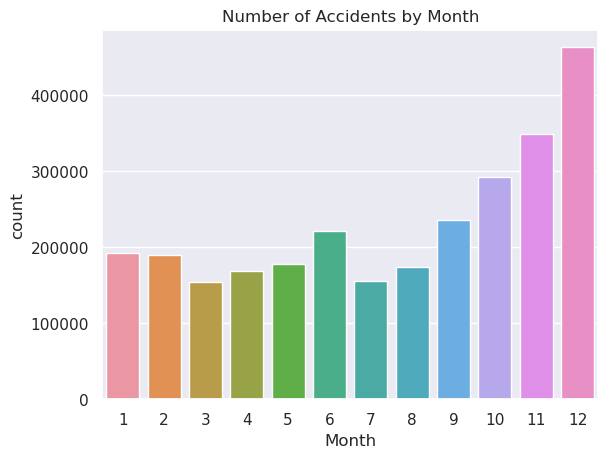

In [11]:
# Plot the number of accidents by month
sns.countplot(x='Month', data=df)
plt.title('Number of Accidents by Month')
plt.savefig('accidents_by_month.png')
plt.show()

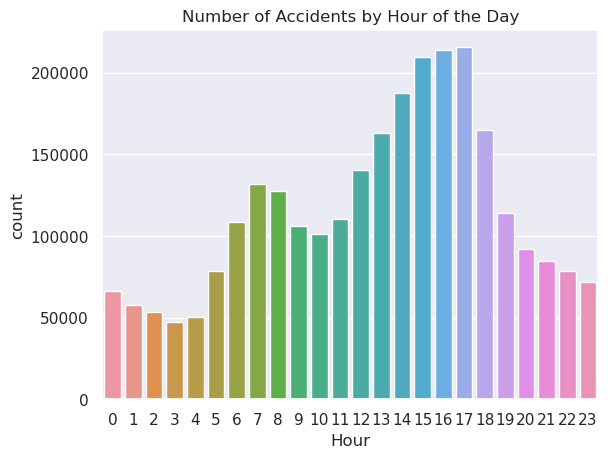

In [12]:
# Plot the number of accidents by day of the week
sns.countplot(x='Hour', data=df)
plt.title('Number of Accidents by Hour of the Day')
plt.savefig('accidents_by_hour.png')
plt.show()

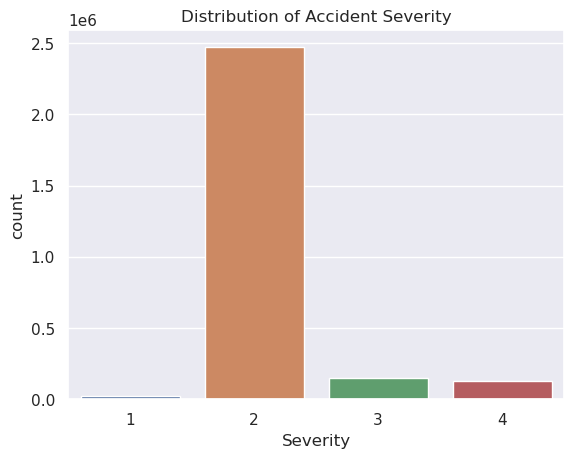

In [13]:
# Plot the distribution of accident severity
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Accident Severity')
plt.savefig('accidents_by_severity.png')
plt.show()

In [20]:
# Correlation Matrix:
# correlation coefficients between pairs of variables in dataset
# indicate how one variable changes when the other variable changes.

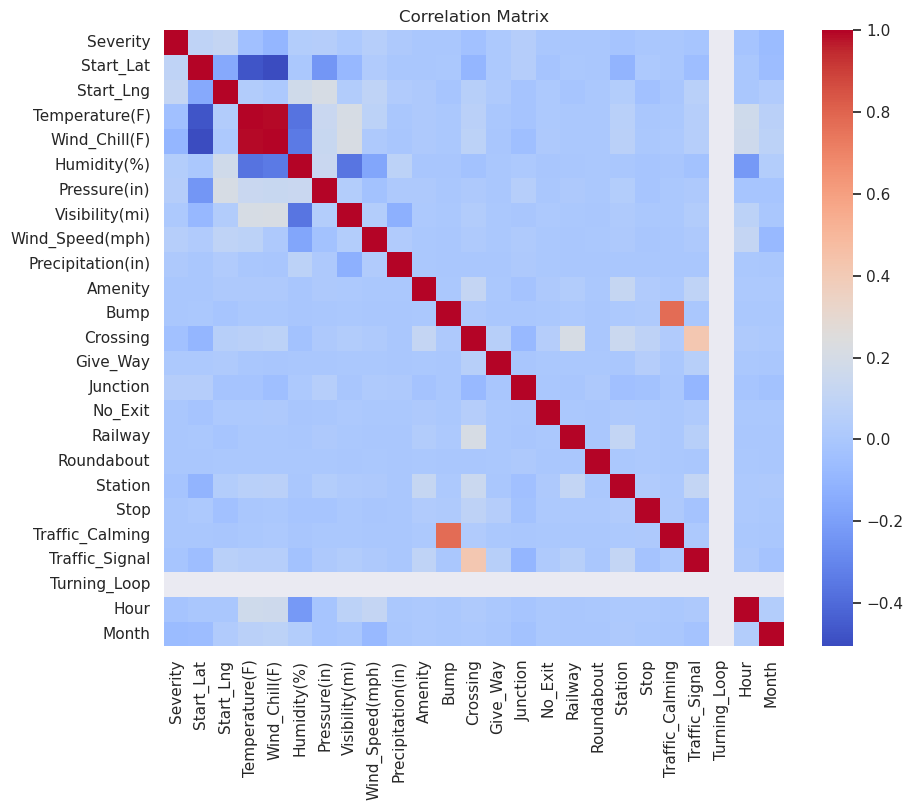

In [26]:
# Plot the correlation matrix between different features
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix_total.png')
plt.show()

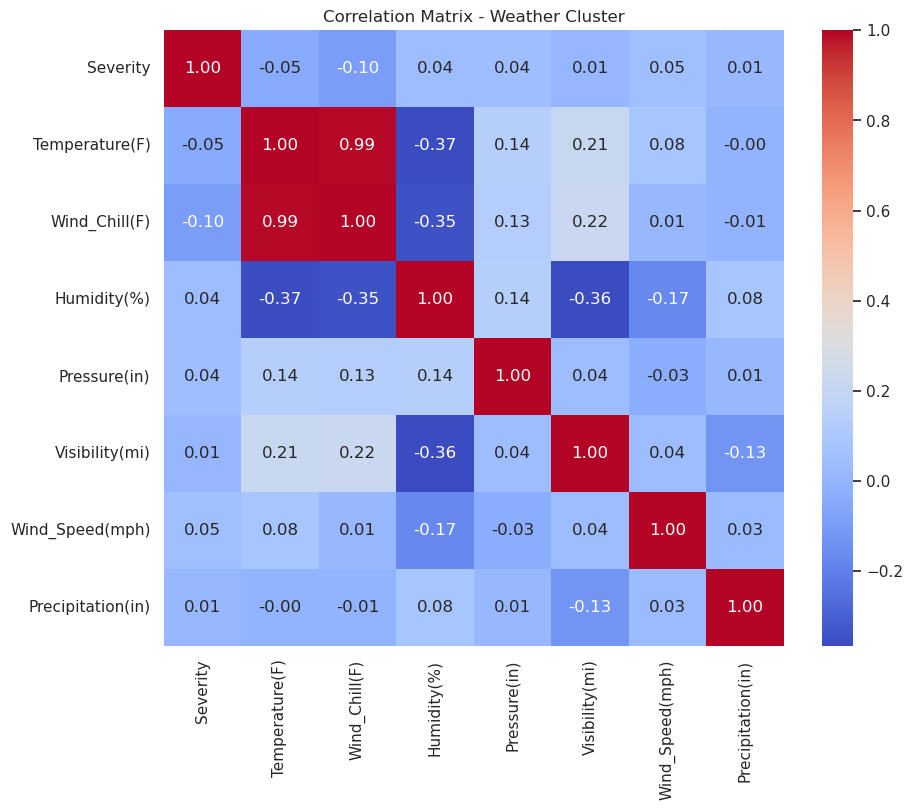

In [30]:
weather_cluster = ['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

plt.figure(figsize=(10, 8))
sns.heatmap(df[weather_cluster].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Weather Cluster')
plt.savefig('correlation_matrix_weather.png')
plt.show()

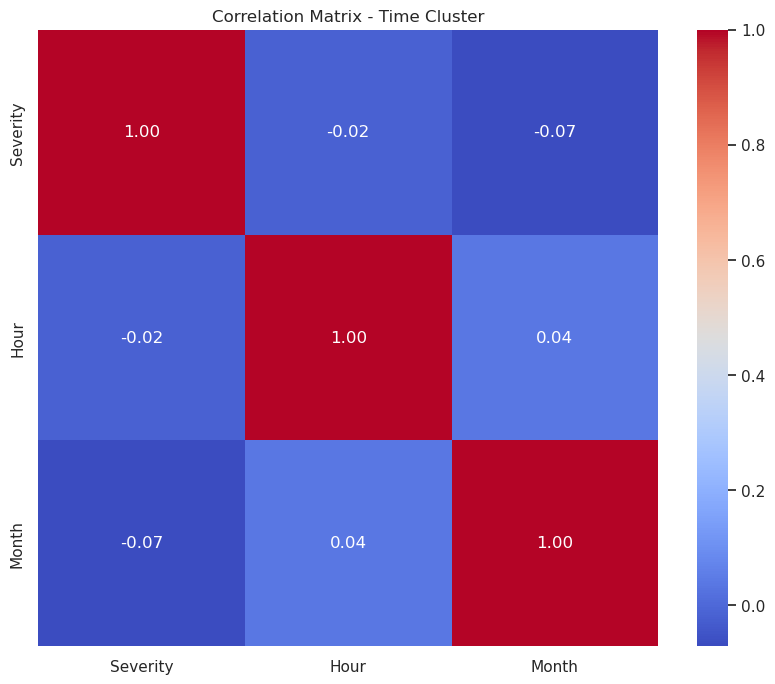

In [31]:
time_cluster = ['Severity', 'Hour', 'Month']
plt.figure(figsize=(10, 8))
sns.heatmap(df[time_cluster].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Time Cluster')
plt.savefig('correlation_matrix_time.png')
plt.show()

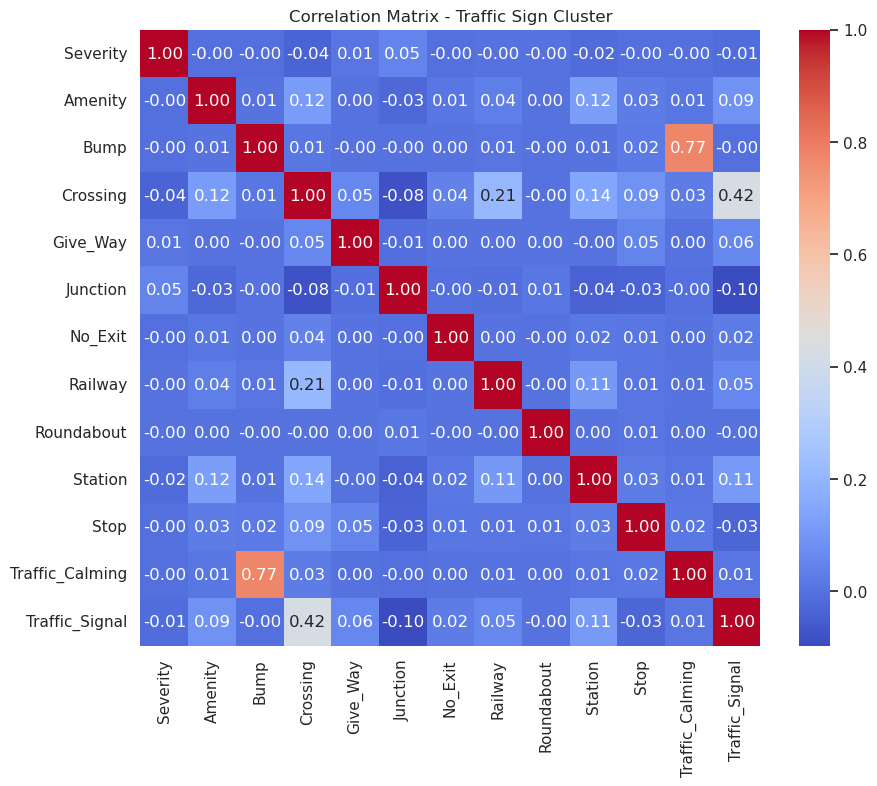

In [38]:
traffic_sign_cluster = ['Severity', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
#cluster2 = ['Visibility(mi)', 'Precipitation(in)', 'Wind_Speed(mph)']

plt.figure(figsize=(10, 8))
sns.heatmap(df[traffic_sign_cluster].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Traffic Sign Cluster')
plt.savefig('correlation_matrix_traffic_sign.png')
plt.show()

In [39]:
# Correlation does not imply causation
# it can provide insights into relationships 
# Hopythesis Generation
# Detect Outliers
# Identify Strong Relationships
# Feature Selection

### Clustering with K-Means


### Cluster based on Temp, Wind Chill, and Humidity

In [50]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [59]:
# Select relevant columns
X = df[["Start_Lng", "Start_Lat", "Temperature(F)", "Wind_Chill(F)", 
        "Humidity(%)"]]

# Preprocess data
X = X.dropna()  # Remove rows with missing values
X_scaled = StandardScaler().fit_transform(X)  # Standardize the features

In [53]:
X

,Start_Lng,Start_Lat,Temperature(F),Wind_Chill(F),Humidity(%)
0,-94.486080,39.105609,87.0,87.0,48.0
1,-122.525960,37.973774,73.0,73.0,33.0
2,-96.791708,32.802966,41.0,36.0,53.0
3,-89.957760,30.048197,81.0,81.0,65.0
4,-122.216752,37.832719,52.0,52.0,100.0
...,...,...,...,...,...
49995,-74.219459,40.424784,54.0,54.0,42.0
49996,-93.141838,44.951654,31.0,19.0,82.0
49997,-93.146516,44.951640,33.0,28.0,89.0
49998,-111.910589,40.782355,78.0,78.0,46.0


In [54]:
X_scaled

array([[ 0.03749924,  0.67806956,  1.2111498 ,  1.15928523, -0.69543765],
       [-1.52845848,  0.47091347,  0.38637436,  0.39420527, -1.35992759],
       [-0.09126436, -0.47548275, -1.49882664, -1.62779176, -0.473941  ],
       ...,
       [ 0.11231056,  1.74804966, -1.97012689, -2.06498031,  1.12083486],
       [-0.93561635,  0.98495894,  0.68093702,  0.66744811, -0.78403631],
       [ 0.76419648, -1.27260509,  1.2111498 ,  1.15928523,  0.36774626]])

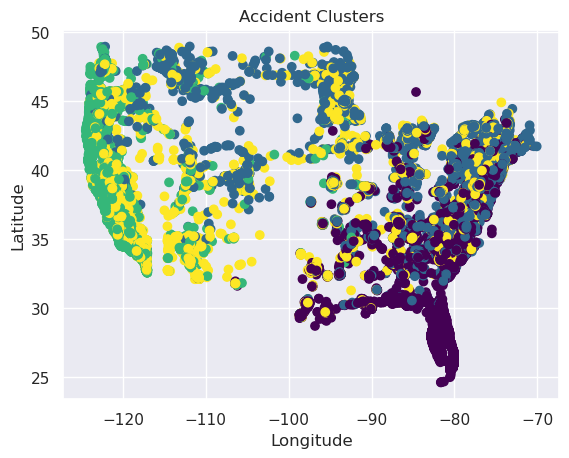

In [55]:
# Perform clustering
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_scaled)
X["Cluster"] = labels
# Visualize clusters
plt.scatter(X["Start_Lng"], X["Start_Lat"], c=X["Cluster"], cmap="viridis")
plt.title("Accident Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

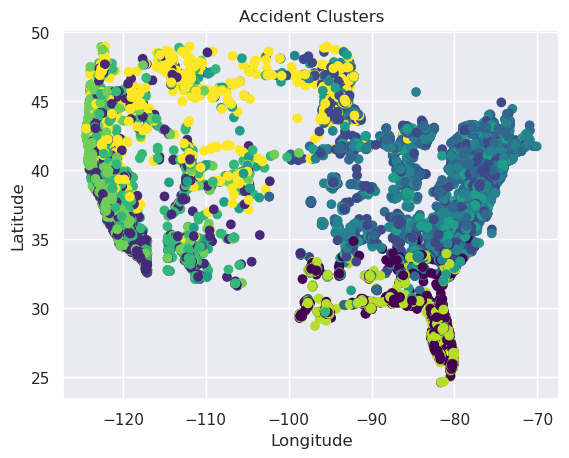

In [56]:
# Perform clustering
kmeans = KMeans(n_clusters=10, random_state=0)
labels = kmeans.fit_predict(X_scaled)
X["Cluster"] = labels
# Visualize clusters
plt.scatter(X["Start_Lng"], X["Start_Lat"], c=X["Cluster"], cmap="viridis")
plt.title("Accident Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

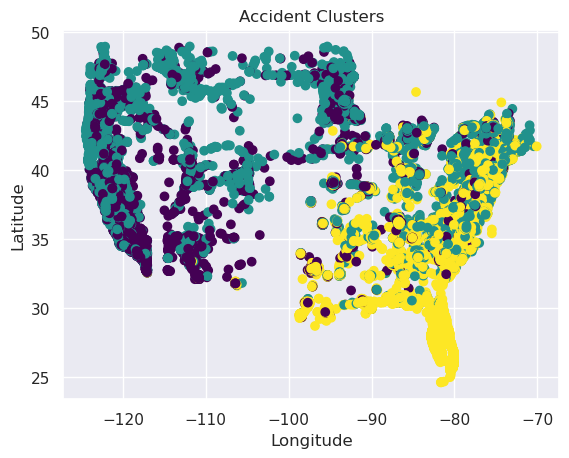

In [57]:
# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_scaled)
X["Cluster"] = labels
# Visualize clusters
plt.scatter(X["Start_Lng"], X["Start_Lat"], c=X["Cluster"], cmap="viridis")
plt.title("Accident Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [60]:
df

,Severity,Start_Time,Start_Lat,Start_Lng,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weekday,Hour,Month
0,2,2021-07-03 13:40:55,39.105609,-94.486080,Kansas City,Jackson,MO,87.0,87.0,48.0,...,False,False,False,Day,Day,Day,Day,Saturday,13,7
1,2,2021-09-29 09:28:00,37.973774,-122.525960,San Rafael,Marin,CA,73.0,73.0,33.0,...,False,False,False,Day,Day,Day,Day,Wednesday,9,9
2,2,2021-12-07 08:45:00,32.802966,-96.791708,Dallas,Dallas,TX,41.0,36.0,53.0,...,False,False,False,Day,Day,Day,Day,Tuesday,8,12
3,2,2021-10-23 13:57:28,30.048197,-89.957760,New Orleans,Orleans,LA,81.0,81.0,65.0,...,False,False,False,Day,Day,Day,Day,Saturday,13,10
4,2,2021-12-13 06:35:00,37.832719,-122.216752,Oakland,Alameda,CA,52.0,52.0,100.0,...,False,False,False,Night,Night,Day,Day,Monday,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,2021-04-07 08:45:59,40.424784,-74.219459,Matawan,Monmouth,NJ,54.0,54.0,42.0,...,False,False,False,Day,Day,Day,Day,Wednesday,8,4
49996,2,2021-12-10 22:30:32,44.951654,-93.141838,Saint Paul,Ramsey,MN,31.0,19.0,82.0,...,False,False,False,Night,Night,Night,Night,Friday,22,12
49997,2,2021-11-13 22:11:08,44.951640,-93.146516,Saint Paul,Ramsey,MN,33.0,28.0,89.0,...,False,False,False,Night,Night,Night,Night,Saturday,22,11
49998,2,2021-07-27 05:47:00,40.782355,-111.910589,Salt Lake City,Salt Lake,UT,78.0,78.0,46.0,...,False,False,False,Night,Night,Day,Day,Tuesday,5,7


### Cluster Based on County

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0          Jackson
1            Marin
2           Dallas
3          Orleans
4          Alameda
           ...    
49995     Monmouth
49996       Ramsey
49997       Ramsey
49998    Salt Lake
49999       Orange
Name: County, Length: 50000, dtype: object

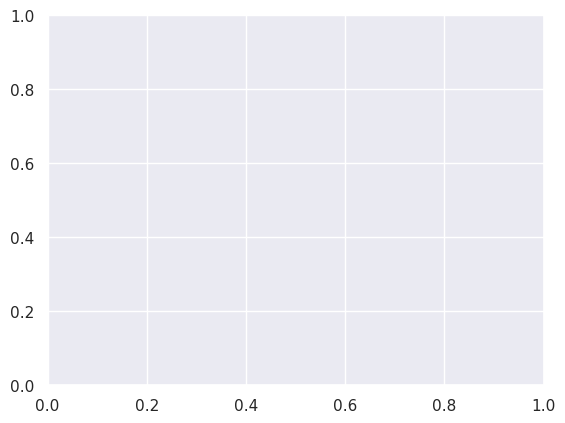

In [81]:
# Create a copy of df to work with
us_accidents = df.copy()

# Select relevant columns
us_accidents = us_accidents[["Start_Lat", "Start_Lng", "County"]]

# Drop rows with missing values
us_accidents.dropna(inplace=True)

# Scale the data
X = us_accidents[["Start_Lat", "Start_Lng"]]
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Cluster data using K-means
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the data
us_accidents["Cluster"] = labels

plt.scatter(us_accidents['Start_Lng'], us_accidents['Start_Lat'], c=us_accidents['County'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Display the results
print(us_accidents.groupby("Cluster").size())


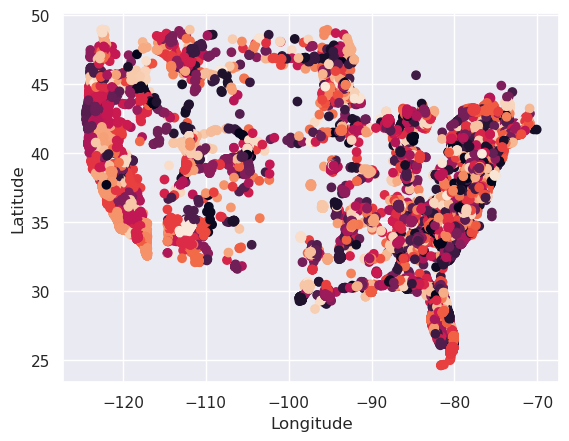

In [82]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'County' column
us_accidents['County_encoded'] = label_encoder.fit_transform(us_accidents['County'])

# Plot the scatter plot with the encoded 'County' column
plt.scatter(us_accidents['Start_Lng'], us_accidents['Start_Lat'], c=us_accidents['County_encoded'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


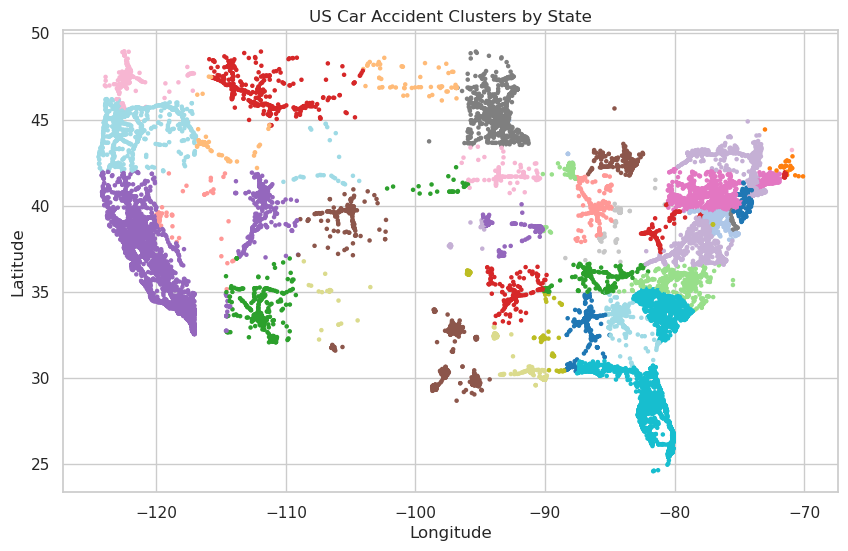

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# create a dictionary with state abbreviations as keys and distinct colors as values
state_colors = {'AL': '#1f77b4', 'AK': '#ff7f0e', 'AZ': '#2ca02c', 'AR': '#d62728', 'CA': '#9467bd',
                'CO': '#8c564b', 'CT': '#e377c2', 'DE': '#7f7f7f', 'DC': '#bcbd22', 'FL': '#17becf',
                'GA': '#9edae5', 'HI': '#aec7e8', 'ID': '#ffbb78', 'IL': '#98df8a', 'IN': '#ff9896',
                'IA': '#f7b6d2', 'KS': '#c5b0d5', 'KY': '#c7c7c7', 'LA': '#dbdb8d', 'ME': '#17becf',
                'MD': '#aec7e8', 'MA': '#ff7f0e', 'MI': '#8c564b', 'MN': '#7f7f7f', 'MS': '#bcbd22',
                'MO': '#9467bd', 'MT': '#d62728', 'NE': '#2ca02c', 'NV': '#ff9896', 'NH': '#f7b6d2',
                'NJ': '#1f77b4', 'NM': '#dbdb8d', 'NY': '#c5b0d5', 'NC': '#98df8a', 'ND': '#ffbb78',
                'OH': '#c7c7c7', 'OK': '#bcbd22', 'OR': '#9edae5', 'PA': '#e377c2', 'RI': '#d62728',
                'SC': '#17becf', 'SD': '#7f7f7f', 'TN': '#2ca02c', 'TX': '#8c564b', 'UT': '#9467bd',
                'VT': '#ff7f0e', 'VA': '#c5b0d5', 'WA': '#f7b6d2', 'WV': '#d62728', 'WI': '#aec7e8',
                'WY': '#9edae5'}

# create a scatter plot with each point colored based on its state
plt.figure(figsize=(10,6))
plt.scatter(df['Start_Lng'], df['Start_Lat'], c=df['State'].apply(lambda x: state_colors[x]), s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('US Car Accident Clusters by State')
plt.show()
